In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

warnings.filterwarnings('ignore')

In [34]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

stuper = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()
stuper['total'] = stuper['math score'] + stuper['reading score'] + stuper['writing score']
print(stuper.columns)
stuper.head()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total'],
      dtype='object')


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

The histograms show a relatively normal shape with a longer tail on the left (a left skew) for each of the score distributions, so I'm sure they're not statistically normal. I'll apply a Box-Cox transformation.

Because there's at least one score of zero in the math scores I wasn't able to apply a Box-Cox. I'll replace all zeroes with ones as I don't think it will affect the integrity of the data. The distributions look more normal once I've applied the Box-Cox and the p-values increase, confirming that the distributions are statistically closer to normal.

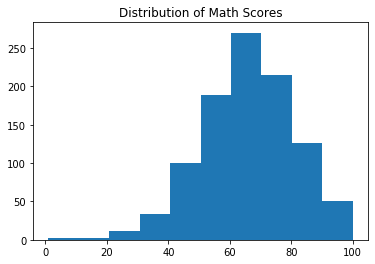

Jarque-Bera test statistics for Box-Cox applied math scores is 15.230308642482925 and p value is 0.0004929246076665894
Normality test statistics for Box-Cox applied math scores is 14.829070008237682 and p value is 0.000602432456595843


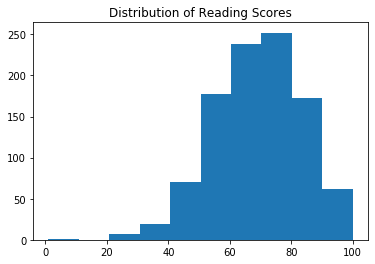

Jarque-Bera test statistics for reading scores is 17.103129099015913 and p value is 0.0001932425254256298
Normality test statistics for reading scores is 16.72369944544701 and p value is 0.00023361181678824172


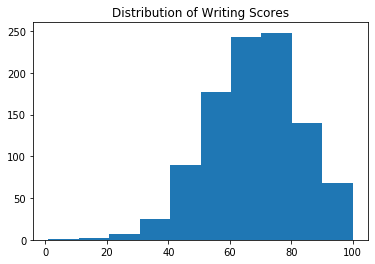

Jarque-Bera test statistics for writing scores is 16.93589780607829 and p value is 0.00021009538774086067
Normality test statistics for writing scores is 16.546562170667784 and p value is 0.00025524643050318485


In [28]:
# Distributions of scores before Box-Cox Application
plt.title('Distribution of Math Scores')
plt.hist(x='math score', data=stuper)
plt.show()

jb_stats = stats.jarque_bera(stuper['math score'])
norm_stats = stats.normaltest(stuper['math score'])

print("Jarque-Bera test statistics for Box-Cox applied math scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for Box-Cox applied math scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


plt.title('Distribution of Reading Scores')
plt.hist(x='reading score', data=stuper)
plt.show()

jb_stats = stats.jarque_bera(stuper['reading score'])
norm_stats = stats.normaltest(stuper['reading score'])

print("Jarque-Bera test statistics for reading scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for reading scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


plt.title('Distribution of Writing Scores')
plt.hist(x='writing score', data=stuper)
plt.show()

jb_stats = stats.jarque_bera(stuper['writing score'])
norm_stats = stats.normaltest(stuper['writing score'])

print("Jarque-Bera test statistics for writing scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for writing scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Testing for statistically normal distribution with Jarque-Bera and Normal tests after Box-Cox application
Score Distributions after Box-Cox has been applied


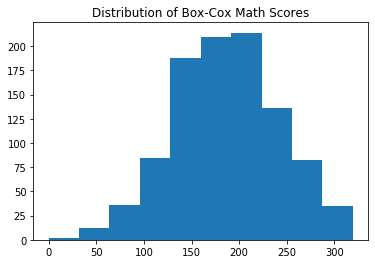

Jarque-Bera test statistics for Box-Cox applied math scores is 0.9589872977598923 and p value is 0.6190967928084308
Normality test statistics for Box-Cox applied math scores is 0.9034195001197268 and p value is 0.6365388982921865


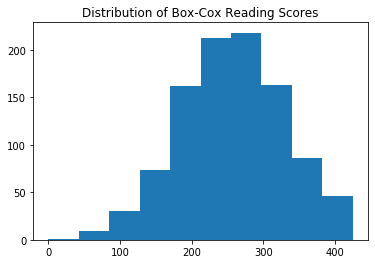

Jarque-Bera test statistics for Box-Cox applied reading scores is 3.1076660598434134 and p value is 0.21143597818819404
Normality test statistics for Box-Cox applied reading scores is 3.696196036444856 and p value is 0.15753651312456154


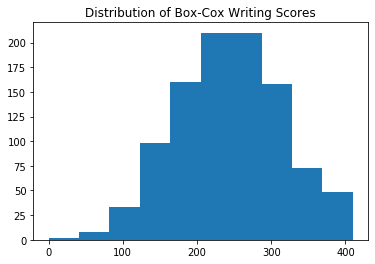

Jarque-Bera test statistics for Box-Cox applied writing scores is 4.232873762434193 and p value is 0.1204600783170301
Normality test statistics for Box-Cox applied writing scores is 5.362875546501041 and p value is 0.06846464671791158


In [36]:
print('Testing for statistically normal distribution with Jarque-Bera and Normal tests after Box-Cox application')

# Removing 0s from math scores and applying Box-Cox transformation
stuper.loc[stuper['math score'] == 0] = 1
math_scores_boxcox,_ = stats.boxcox(stuper['math score'])
reading_scores_boxcox,_ = stats.boxcox(stuper['reading score'])
writing_scores_boxcox,_ = stats.boxcox(stuper['writing score'])

# Score distributions after Box-Cox has been applied
print('Score Distributions after Box-Cox has been applied')
plt.title('Distribution of Box-Cox Math Scores')
plt.hist(math_scores_boxcox)
plt.show()

jb_stats = stats.jarque_bera(math_scores_boxcox)
norm_stats = stats.normaltest(math_scores_boxcox)

print("Jarque-Bera test statistics for Box-Cox applied math scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for Box-Cox applied math scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


plt.title('Distribution of Box-Cox Reading Scores')
plt.hist(reading_scores_boxcox)
plt.show()

jb_stats = stats.jarque_bera(reading_scores_boxcox)
norm_stats = stats.normaltest(reading_scores_boxcox)

print("Jarque-Bera test statistics for Box-Cox applied reading scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for Box-Cox applied reading scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


plt.title('Distribution of Box-Cox Writing Scores')
plt.hist(writing_scores_boxcox)
plt.show()

jb_stats = stats.jarque_bera(writing_scores_boxcox)
norm_stats = stats.normaltest(writing_scores_boxcox)

print("Jarque-Bera test statistics for Box-Cox applied writing scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for Box-Cox applied writing scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))




2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

The Jarque-Bera and Normal tests indicate that the weighted average is very close to zero. When I apply a Box-Cox transformation, the p-values for both tests increase, indicating the distribution it closer to normal.

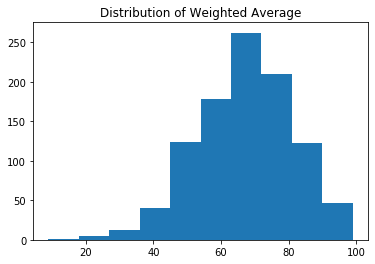

Jarque-Bera test statistics for weighted average is 15.453387913085441 and p value is 0.00044089934264401887
Normality test statistics for weighted average is 15.186721327231577 and p value is 0.0005037851534493836
Jarque-Bera test statistics for Box-Cox transformed weighted average is 2.4353990936623884 and p value is 0.2959101118879546
Normality test statistics for Box-Cox transformed weighted average is 2.77985790332585 and p value is 0.24909300164653306


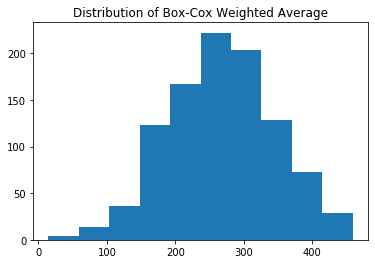

In [35]:
stuper['weighted average'] = stuper['math score'] * 0.33 + stuper['reading score'] * 0.33 + stuper['writing score'] * 0.33
plt.title('Distribution of Weighted Average')
plt.hist(x='weighted average', data=stuper)
plt.show()

jb_stats = stats.jarque_bera(stuper['weighted average'])
norm_stats = stats.normaltest(stuper['weighted average'])

print("Jarque-Bera test statistics for weighted average is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for weighted average is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))



weighted_average_boxcox,_ = stats.boxcox(stuper['weighted average'])
jb_stats = stats.jarque_bera(weighted_average_boxcox)
norm_stats = stats.normaltest(weighted_average_boxcox)

plt.title('Distribution of Box-Cox Weighted Average')
plt.hist(x=weighted_average_boxcox)

print("Jarque-Bera test statistics for Box-Cox transformed weighted average is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for Box-Cox transformed weighted average is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

The reading score seems to be the variable most closely related to the target variable. How could I compare other variables?

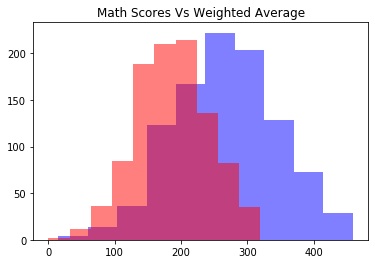

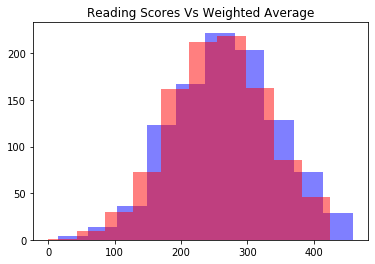

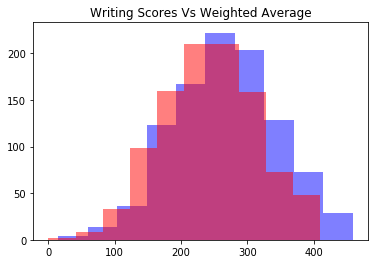

In [38]:
plt.title('Math Scores Vs Weighted Average')
plt.hist(weighted_average_boxcox, color='blue',  alpha=.5,label='Weighted Average')  # alpha just controls the opacity
plt.hist(math_scores_boxcox, color='red', alpha=.5,label='Math Scores')
plt.show()

plt.title('Reading Scores Vs Weighted Average')
plt.hist(weighted_average_boxcox, color='blue',  alpha=.5,label='Weighted Average')  # alpha just controls the opacity
plt.hist(reading_scores_boxcox, color='red', alpha=.5,label='Reading Scores')
plt.show()

plt.title('Writing Scores Vs Weighted Average')
plt.hist(weighted_average_boxcox, color='blue',  alpha=.5,label='Weighted Average')  # alpha just controls the opacity
plt.hist(writing_scores_boxcox, color='red', alpha=.5,label='Writing Scores')
plt.show()